In [2]:
from imblearn.under_sampling import RandomUnderSampler

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.utils import plot_model

from keras.layers import Input, Dense
from keras.models import Model

In [4]:
from tensorflow.keras.utils import plot_model

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.shape

(284807, 31)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


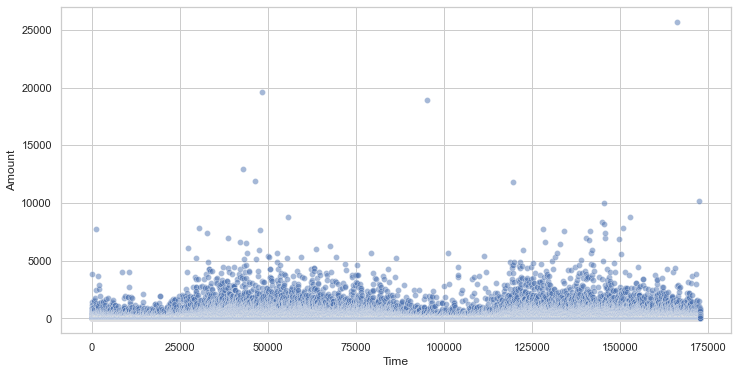

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Time", y="Amount", data=data, alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

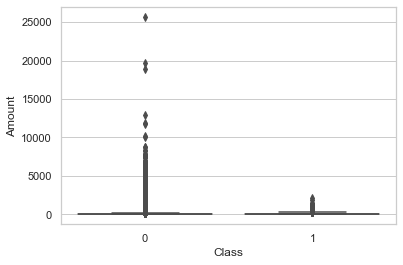

In [10]:
sns.boxplot(x="Class",y="Amount", data= data)

<AxesSubplot:xlabel='Class', ylabel='Time'>

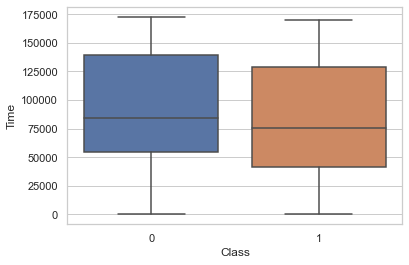

In [11]:
sns.boxplot(x="Class",y="Time", data= data)

In [12]:
data = data.drop('Time', axis = 1)

In [13]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
X = data.drop(columns=["Class"])
y = data["Class"]

In [20]:
under_sampler = RandomUnderSampler(random_state=42)

# Izvođenje under-samplinga
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [28]:
undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)
undersampled_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [31]:
fraud_data = undersampled_data[undersampled_data["Class"] == 1]
non_fraud_data = undersampled_data[undersampled_data["Class"] == 0]

In [32]:
X_non_fraud = non_fraud_data.drop(columns=["Class"])
y_non_fraud = non_fraud_data["Class"]

X_train, X_non_fraud_test, y_train, y_non_fraud_test = train_test_split(X_non_fraud, y_non_fraud, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(393, 29)

In [34]:
X_test = pd.concat([X_non_fraud_test, fraud_data.drop(columns=["Class"])], axis=0)
y_test = pd.concat([y_non_fraud_test, fraud_data["Class"]], axis=0)

In [35]:
y_train.value_counts()

0    393
Name: Class, dtype: int64

In [37]:
y_train.value_counts()

0    393
Name: Class, dtype: int64

In [38]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
237800,-1.142199,-2.988773,-0.298093,-1.379210,2.588149,-2.368300,-1.417269,-0.012458,-0.536215,1.041540,...,0.599568,0.790943,1.518132,0.708689,0.736077,-1.824686,-0.480342,0.070206,0.173133,20.10
35947,-0.730779,-0.075013,2.316032,-1.902745,-0.551713,-0.037457,0.541981,-0.058828,-1.580708,0.068131,...,0.338117,0.136743,0.217508,0.000121,0.195500,0.143696,-0.527853,-0.145276,-0.162602,96.00
9957,-0.387391,1.186199,1.403407,0.218442,0.278908,-0.460588,0.555124,-0.016764,0.883889,-0.929780,...,0.047238,-0.384368,-0.760857,0.035235,-0.038538,-0.254887,0.062834,0.234124,0.088750,6.99
94098,0.570458,-1.150247,-0.244991,0.886167,-0.359874,0.343328,0.309613,-0.003521,0.564200,-0.382562,...,0.551482,-0.053796,-0.756643,-0.363416,-0.732485,0.344634,0.315641,-0.076860,0.060694,357.20
64688,-1.373063,0.967682,0.205818,-3.853663,-0.331673,-0.781527,0.308689,-1.379227,1.505784,-2.686898,...,-0.695291,1.412877,-0.758137,-0.058030,-0.465635,0.437058,-1.178778,0.116927,0.042981,57.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35123,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,-2.479646,...,-0.125064,0.147327,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,350.00
84735,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,-0.664655,...,0.001642,-0.023137,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,12.95
221064,1.877769,-1.320396,-0.838144,-0.319262,-0.916783,-0.100731,-0.668276,-0.021534,0.134654,0.691509,...,-0.333393,-0.742437,-1.884560,0.447065,0.398407,-0.751949,0.116801,-0.052665,-0.015096,146.81
175852,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,-0.121252,...,0.308820,0.021068,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,229.88


In [39]:
scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train["Amount"].values.reshape(-1, 1))
X_test["Amount"] = scaler.transform(X_test["Amount"].values.reshape(-1, 1))

In [40]:
input_layer = Input(shape=(X_train.shape[1],))

In [41]:
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

In [42]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

In [43]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 29)                3741  

In [48]:
autoencoder.fit(X_train, X_train, epochs=150, batch_size=256, shuffle=True)

Epoch 1/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6301
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6301
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6301
Epoch 4/150
2/2 [==============================] - 0s 8ms/step - loss: 0.6301
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6301
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6300
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6299
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 0.6299
Epoch 9/150
2/2 [==============================] - 0s 7ms/step - loss: 0.6298
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6297
Epoch 11/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6298
Epoch 12/150
2/2 [==============================] - 0s 7ms/step - loss: 0.6298
Epoch 13/150
2/2 [==============================] - 0s 7ms/st

In [49]:
reconstructed = autoencoder.predict(X_test)

mse = ((X_test - reconstructed) ** 2).mean(axis=1)

mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df

19/19 [==============================] - 0s 1ms/step


,Reconstruction_error,True_class
66724,0.231339,0
11840,0.668280,0
155967,0.468406,0
17472,0.158044,0
32795,0.076031,0
...,...,...
279863,6.842733,1
280143,3.648002,1
280149,3.176130,1
281144,6.964592,1


In [50]:
error_df.describe()

,Reconstruction_error,True_class
count,591.000000,591.000000
mean,22.981189,0.832487
std,36.539207,0.373749
min,0.076031,0.000000
25%,1.386966,1.000000
50%,8.014686,1.000000
75%,22.748150,1.000000
max,283.058993,1.000000


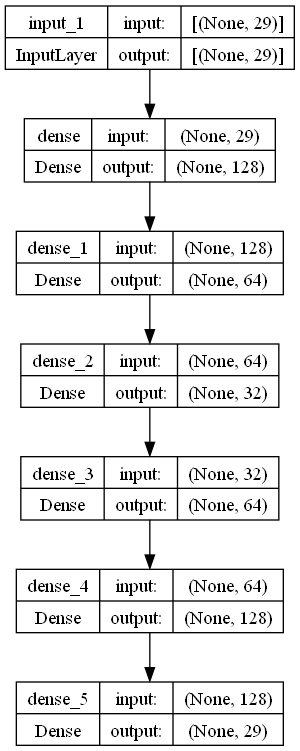

In [51]:
plot_model(autoencoder, to_file="autoencoder.png", show_shapes=True)

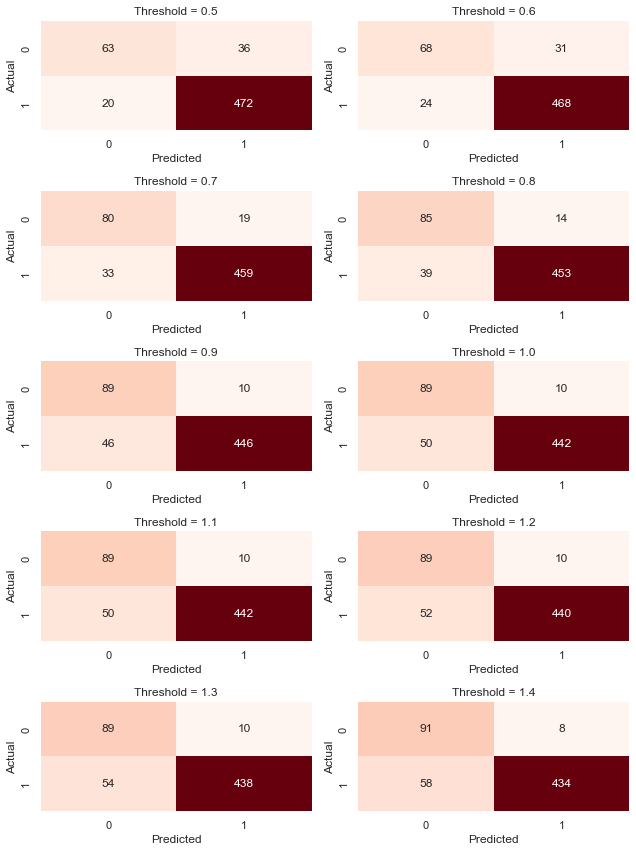

In [71]:
num_thresholds = 10

n_rows = 5
n_cols = num_thresholds // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 12))

for i, ax in enumerate(axes.ravel()):
    if i < num_thresholds:
        threshold = (i + 5) / 10.0
        y_pred = [1 if error > threshold else 0 for error in mse]
        confusion = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False, ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title(f"Threshold = {threshold}")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [103]:
threshold = 0.7

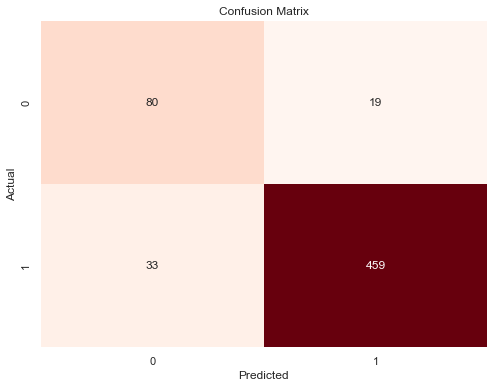

In [104]:
y_pred = [1 if error > threshold else 0 for error in mse]
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [105]:
accuracy = accuracy_score(y_test, y_pred)

In [106]:
accuracy

0.9120135363790186

In [107]:
report = classification_report(y_test, y_pred)

In [108]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        99
           1       0.96      0.93      0.95       492

    accuracy                           0.91       591
   macro avg       0.83      0.87      0.85       591
weighted avg       0.92      0.91      0.91       591



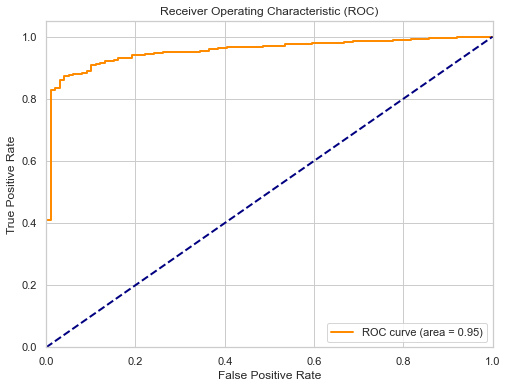

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

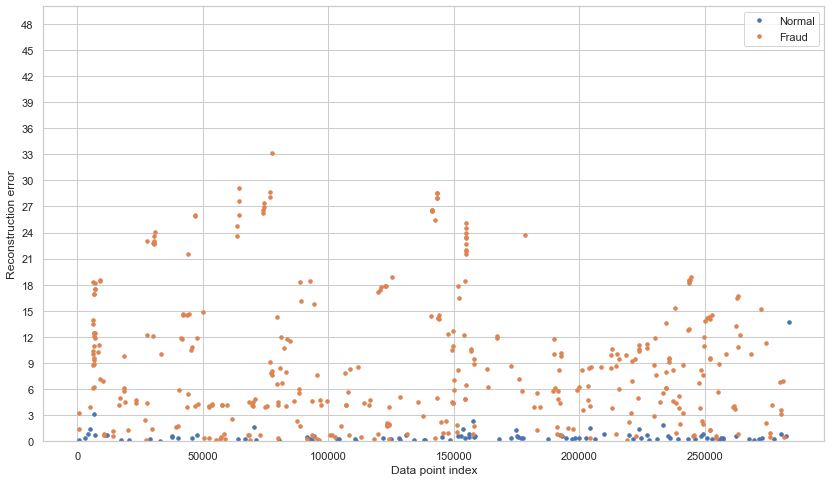

In [110]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.legend()
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.yticks(range(0, 51, 3)) 

plt.ylim(0, 50);

plt.show();

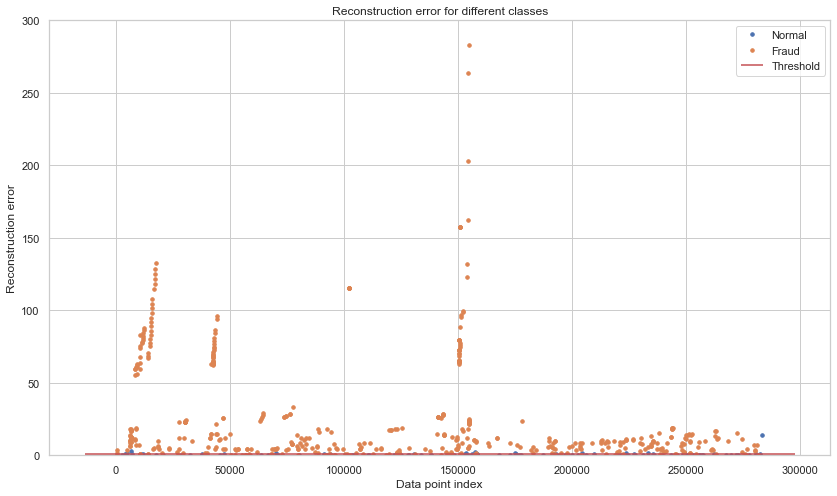

In [111]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 300);

plt.show();

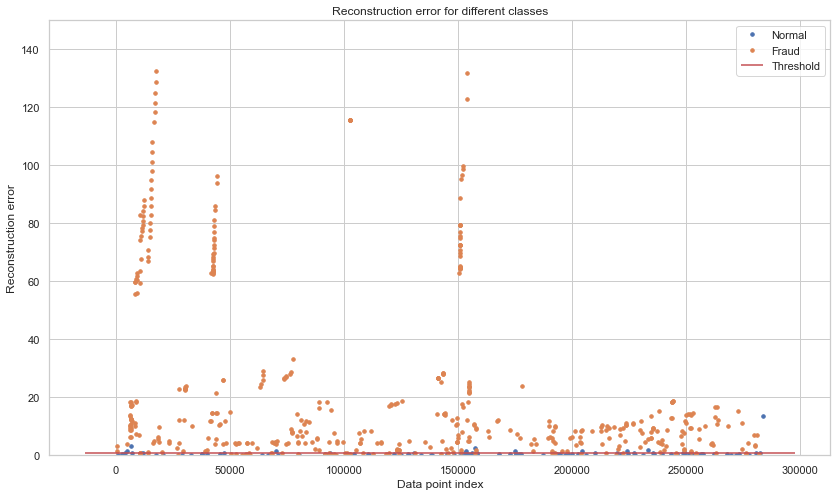

In [112]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 150);

plt.show();

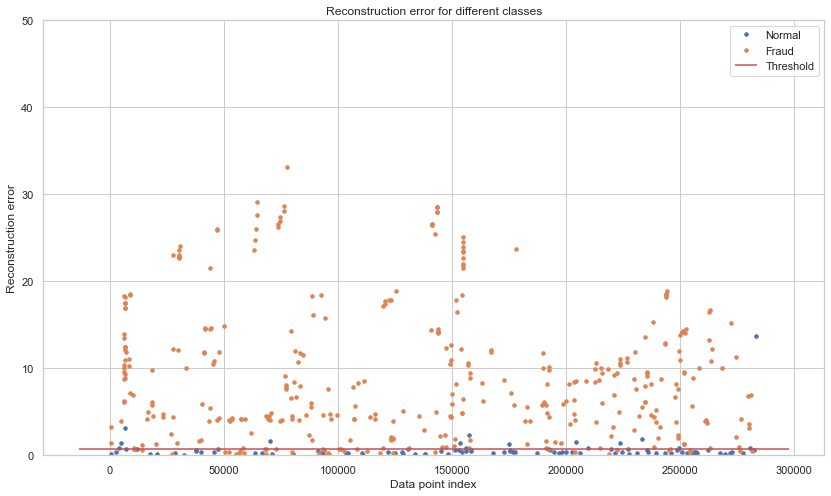

In [113]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 50);

plt.show();

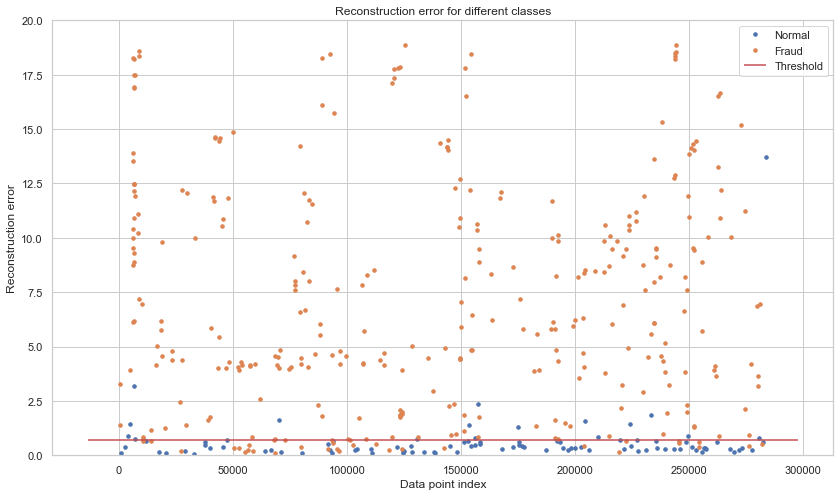

In [114]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 20);

plt.show();